In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

In [93]:
barcodes = pd.read_excel('NxW MinION master list.xlsx', sheet_name = 'Index PCR', engine='openpyxl')
barcodes = barcodes[barcodes['Study'] == 'NxW_16S']
barcodes = barcodes[~barcodes['Barcode'].isnull()]
barcodes = barcodes[['Sample name', 'Barcode','Notes']].set_index('Sample name')
barcodes.head()

Barcode          Notes
Sample name                        
2                1.0  NxW_A library
6                2.0  NxW_A library
15               3.0  NxW_A library
16               4.0  NxW_A library
19               5.0  NxW_A library

In [3]:
barcodes.tail()

Barcode              Notes
Sample name                                      
305                       83.0  NxW_16S_C library
CalEXn_16S_C              95.0  NxW_16S_C library
Zymo_16S_C                96.0  NxW_16S_C library
MinION_PCR1_H2O_16S_C     93.0  NxW_16S_C library
MinION_PCR2_H2O_16S_C     94.0  NxW_16S_C library

In [5]:
set(barcodes['Notes'])

{'NxW_16S_C library', 'NxW_A library', 'NxW_B library'}

In [4]:
plot_key = pd.read_excel('ID and Plots.xlsx', engine='openpyxl')
plot_key.head()

ID Plot  Nitrogen  Water  Block  Water rate (%ET)  Nrate (llbs/acre)
0  111   2N         1      1      1               100                 20
1  111   2S         1      1      1               100                 20
2  112   5N         2      1      1               100                 65
3  112   5S         2      1      1               100                 65
4  113   4N         3      1      1               100                110

In [128]:
soil_key = pd.read_excel('Data/Soil key/Soil DNA extraction key.xlsx', engine='openpyxl')
soil_key = soil_key[soil_key['Skipping'] != 'Yes']
soil_key = soil_key[soil_key['Quality'] != 'Failed']
soil_key = soil_key[['Sample name', 'Sample date', 'Plot']]
soil_key.rename({'Plot':'Sample ID'}, axis = 1, inplace = True)
soil_key = soil_key[~soil_key['Sample ID'].isnull()]
soil_key[['Plot', 'ID', 'Nitrogen', 'Water', 'Block', 'Direction']] = np.nan
soil_key_nxwater = soil_key.copy()
for index, row in soil_key.iterrows():
    if (row['Sample ID'] == 'King Fischer') | (row['Sample ID'] == 'stove pipe prairie') | (row['Sample ID'] == 'NaN'):
        continue
    tmp_data = plot_key[plot_key['Plot'] == row['Sample ID']]
    soil_key_nxwater.loc[index, 'Plot'] = tmp_data['Plot'].iloc[0]
    soil_key_nxwater.loc[index, 'ID'] = tmp_data['ID'].iloc[0]
    soil_key_nxwater.loc[index, 'Block'] = tmp_data['Block'].iloc[0]
    soil_key_nxwater.loc[index, 'Water'] = tmp_data['Water'].iloc[0]
    soil_key_nxwater.loc[index, 'Nitrogen'] = tmp_data['Nitrogen'].iloc[0]
soil_key_nxwater['Direction'] = [x[-1:] for x in soil_key['Sample ID']]
# soil_key_nxwater['Sample date'] = [x.strftime('%m-%d') for x in soil_key['Sample date']]
soil_key_nxwater = soil_key_nxwater[soil_key_nxwater['Nitrogen'].isin([1,5,6])]
soil_key_nxwater.set_index('Sample name', inplace = True)
soil_key_nxwater.head()

/tmp/ipykernel_1812/57803648.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  soil_key_nxwater.loc[index, 'Plot'] = tmp_data['Plot'].iloc[0]


Sample date Sample ID Plot     ID  Nitrogen  Water  Block  \
Sample name                                                             
2            2021-07-27       15N  15N  225.0       5.0    2.0    2.0   
6            2021-07-27       32N  32N  311.0       1.0    1.0    3.0   
15           2021-07-27        8N   8N  121.0       1.0    2.0    1.0   
16           2021-07-27        2S   2S  111.0       1.0    1.0    1.0   
19           2021-07-27       30N  30N  321.0       1.0    2.0    3.0   

            Direction  
Sample name            
2                   N  
6                   N  
15                  N  
16                  S  
19                  N

In [127]:
soil_key_nxwater[['Sample date','ID']].groupby(['Sample date']).count()

ID
Sample date    
2021-06-15   35
2021-06-30   33
2021-07-27   35
2021-08-10   34
2021-09-23   31
2022-05-26   18
2022-06-22   17
2022-07-20   16
2022-09-01   17
2022-09-27    9

In [129]:
soil_key_nxwater.tail()

Sample date Sample ID Plot     ID  Nitrogen  Water  Block  \
Sample name                                                             
302          2022-09-27       13S  13S  226.0       6.0    2.0    2.0   
303          2022-09-27       30S  30S  321.0       1.0    2.0    3.0   
304          2022-09-27       28S  28S  325.0       5.0    2.0    3.0   
305          2022-09-27       26S  26S  326.0       6.0    2.0    3.0   
306          2022-09-01       28S  28S  325.0       5.0    2.0    3.0   

            Direction  
Sample name            
302                 S  
303                 S  
304                 S  
305                 S  
306                 S

In [130]:
set(soil_key_nxwater['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [131]:
barcodes[barcodes['Barcode'] == 67]

Barcode              Notes
Sample name                            
102             67.0      NxW_A library
207             67.0      NxW_B library
289             67.0  NxW_16S_C library

In [133]:
mapping_file = pd.merge(soil_key_nxwater, barcodes, left_index=True, right_index=True)
mapping_file['Barcode_key'] = ['barcode' + str(int(x)).zfill(2) for x in mapping_file['Barcode']]
barcodes_list = []
for i, barcode in enumerate(mapping_file['Barcode_key']):
    if '_A' in mapping_file.iloc[i,9]:
        barcodes_list.append(barcode + 'A')
    if '_B' in mapping_file.iloc[i,9]:
        barcodes_list.append(barcode + 'B')
    if '_C' in mapping_file.iloc[i,9]:
        barcodes_list.append(barcode + 'C')
mapping_file['Barcode_key'] = barcodes_list
mapping_file['Run'] = [x[-1] for x in barcodes_list]
print(mapping_file.shape)
mapping_file.sort_values('Barcode_key', inplace = True)
# mapping_file.to_csv('../SCINet/mapping_file.csv')
# Extract the year from 'Sample date' column and create a new 'Year' column
mapping_file['Year'] = mapping_file['Sample date'].dt.year

map_id_columns = ['Water', 'Nitrogen','Block']
mapping_file.head()

(244, 12)


Sample date Sample ID Plot     ID  Nitrogen  Water  Block  \
Sample name                                                             
2            2021-07-27       15N  15N  225.0       5.0    2.0    2.0   
136          2021-08-10       35S  35S  316.0       6.0    1.0    3.0   
223          2022-05-26        2S   2S  111.0       1.0    1.0    1.0   
6            2021-07-27       32N  32N  311.0       1.0    1.0    3.0   
137          2021-08-10       32S  32S  311.0       1.0    1.0    3.0   

            Direction  Barcode              Notes Barcode_key Run  Year  
Sample name                                                              
2                   N      1.0      NxW_A library  barcode01A   A  2021  
136                 S      1.0      NxW_B library  barcode01B   B  2021  
223                 S      1.0  NxW_16S_C library  barcode01C   C  2022  
6                   N      2.0      NxW_A library  barcode02A   A  2021  
137                 S      2.0      NxW_B library  barcode02B   B  2021

In [134]:
mapping_file.groupby(['Sample date','Run']).count()

Sample ID  Plot  ID  Nitrogen  Water  Block  Direction  \
Sample date Run                                                           
2021-06-15  B           35    35  35        35     35     35         35   
2021-06-30  B           33    33  33        33     33     33         33   
2021-07-27  A           33    33  33        33     33     33         33   
            B            2     2   2         2      2      2          2   
2021-08-10  A           32    32  32        32     32     32         32   
            B            2     2   2         2      2      2          2   
2021-09-23  A           24    24  24        24     24     24         24   
            B            7     7   7         7      7      7          7   
2022-05-26  C           18    18  18        18     18     18         18   
2022-06-22  C           17    17  17        17     17     17         17   
2022-07-20  C           16    16  16        16     16     16         16   
2022-09-01  C           16    16  16        16     16     16         16   
2022-09-27  C            9     9   9         9      9      9          9   

                 Barcode  Notes  Barcode_key  Year  
Sample date Run                                     
2021-06-15  B         35     35           35    35  
2021-06-30  B         33     33           33    33  
2021-07-27  A         33     33           33    33  
            B          2      2            2     2  
2021-08-10  A         32     32           32    32  
            B          2      2            2     2  
2021-09-23  A         24     24           24    24  
            B          7      7            7     7  
2022-05-26  C         18     18           18    18  
2022-06-22  C         17     17           17    17  
2022-07-20  C         16     16           16    16  
2022-09-01  C         16     16           16    16  
2022-09-27  C          9      9            9     9

In [135]:
barcode_controls = ['barcode85A',
 'barcode95A',
 'barcode88A',
 'barcode91A',
 'barcode92A',
 'barcode87A',
 'barcode96A',
 'barcode90A',
 'barcode93A',
 'barcode86A',
 'barcode89A',
 'barcode95B',
 'barcode96B',
 'barcode92B',
 'barcode93B',
 'barcode94B'
]

In [136]:
mapping_file.head()

Sample date Sample ID Plot     ID  Nitrogen  Water  Block  \
Sample name                                                             
2            2021-07-27       15N  15N  225.0       5.0    2.0    2.0   
136          2021-08-10       35S  35S  316.0       6.0    1.0    3.0   
223          2022-05-26        2S   2S  111.0       1.0    1.0    1.0   
6            2021-07-27       32N  32N  311.0       1.0    1.0    3.0   
137          2021-08-10       32S  32S  311.0       1.0    1.0    3.0   

            Direction  Barcode              Notes Barcode_key Run  Year  
Sample name                                                              
2                   N      1.0      NxW_A library  barcode01A   A  2021  
136                 S      1.0      NxW_B library  barcode01B   B  2021  
223                 S      1.0  NxW_16S_C library  barcode01C   C  2022  
6                   N      2.0      NxW_A library  barcode02A   A  2021  
137                 S      2.0      NxW_B library  barcode02B   B  2021

In [137]:
mapping_file.dtypes

Sample date    datetime64[ns]
Sample ID              object
Plot                   object
ID                    float64
Nitrogen              float64
Water                 float64
Block                 float64
Direction              object
Barcode               float64
Notes                  object
Barcode_key            object
Run                    object
Year                    int32
dtype: object

In [138]:
mapping_file[['Run','ID']].groupby(['Run']).count()

ID
Run    
A    89
B    79
C    76

In [139]:
mapping_file.shape

(244, 13)

# Adding metadata

In [140]:
df = pd.read_csv('Data/Harvest/2021 Nxwater exp Akron Harvest data.csv')
df = df.rename(columns = {'Water Trt' : 'Water', 'N Trt': 'Nitrogen'})
df = df[['Water','Nitrogen', 'Block', 'Grain Yield, 0% MC kg/ha']]
df['Year'] = 2021

df2 = pd.read_csv('Data/Harvest/Akron_2022_Hand_Harvests_yield_by_plot.csv')
df2 = df2.rename(columns = {'Water_Treatment' : 'Water', 'Nitrogen_Treatment': 'Nitrogen', 'Yield_kg_ha_mc_0':'Grain Yield, 0% MC kg/ha'})
df2 = df2[['Water','Nitrogen', 'Block', 'Grain Yield, 0% MC kg/ha']]
df2['Year'] = 2022

# Concatenate the dataframes vertically
combined_df = pd.concat([df, df2], ignore_index=True)

meta_data_columns = ['Grain Yield, 0% MC kg/ha']

map_id_columns = ['Water', 'Nitrogen','Block', 'Year']

columns = meta_data_columns + map_id_columns
print(columns)
print(combined_df.shape)
combined_df.head()

['Grain Yield, 0% MC kg/ha', 'Water', 'Nitrogen', 'Block', 'Year']
(75, 5)


Water  Nitrogen  Block  Grain Yield, 0% MC kg/ha  Year
0    1.0       4.0    1.0                   10668.2  2021
1    1.0       1.0    1.0                    7098.0  2021
2    1.0       5.0    1.0                   12647.4  2021
3    1.0       3.0    1.0                   10125.3  2021
4    1.0       2.0    1.0                    8041.4  2021

In [141]:
df_merged_harvest = pd.merge(mapping_file, combined_df[columns], on = map_id_columns)
print(df_merged_harvest.shape)
df_merged_harvest.head()

(244, 14)


Sample date Sample ID Plot     ID  Nitrogen  Water  Block Direction  \
0  2021-07-27       15N  15N  225.0       5.0    2.0    2.0         N   
1  2021-06-30       15N  15N  225.0       5.0    2.0    2.0         N   
2  2021-06-30       15S  15S  225.0       5.0    2.0    2.0         S   
3  2021-07-27       15S  15S  225.0       5.0    2.0    2.0         S   
4  2021-09-23       15N  15N  225.0       5.0    2.0    2.0         N   

   Barcode          Notes Barcode_key Run  Year  Grain Yield, 0% MC kg/ha  
0      1.0  NxW_A library  barcode01A   A  2021                    5231.1  
1      8.0  NxW_B library  barcode08B   B  2021                    5231.1  
2     15.0  NxW_B library  barcode15B   B  2021                    5231.1  
3     23.0  NxW_A library  barcode23A   A  2021                    5231.1  
4     40.0  NxW_A library  barcode40A   A  2021                    5231.1

In [142]:
set(df_merged_harvest['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

# Extractable N

In [143]:
nitrogen_df = pd.read_csv('Data/Nitrogen/UPDATED Extractable N all dates 21&22 season.csv')
nitrogen_df['date'] = pd.to_datetime(nitrogen_df['date'])
nitrogen_df['date'] = nitrogen_df['date'].replace(pd.to_datetime('2022-09-28 00:00:00'), pd.to_datetime('2022-09-27 00:00:00'))
nitrogen_df = nitrogen_df.drop('Type', axis = 1)
nitrogen_df = nitrogen_df[nitrogen_df['date'].isin(mapping_file['Sample date'])]
nitrogen_df = nitrogen_df.rename(columns = {'date' : 'Sample date', 'Irr' : 'Water', 'Nrate': 'Nitrogen',
                                           'lbs.NH4.N.per.ac':'lbs NH4-N / ac','lbs.NO3.N.per.ac':'lbs NO3-N / ac',
                                            'lbs.Total.N.per.ac':'Total N / ac'})
nitrogen_df = nitrogen_df[nitrogen_df['lbs NH4-N / ac'] != 'x']
nitrogen_df = nitrogen_df[nitrogen_df['lbs NO3-N / ac'] != 'x']
nitrogen_df = nitrogen_df[nitrogen_df['Total N / ac'] != 'x']

nitrogen_df['lbs NH4-N / ac'] = nitrogen_df['lbs NH4-N / ac'].astype('float64')
nitrogen_df['lbs NO3-N / ac'] = nitrogen_df['lbs NO3-N / ac'].astype('float64')
nitrogen_df['Total N / ac'] = nitrogen_df['Total N / ac'].astype('float64')
nitrogen_df = nitrogen_df.groupby(['Sample date','Water','Nitrogen','Block','Direction']).mean().reset_index()
print(nitrogen_df.shape)
nitrogen_df.head()

(261, 14)


Sample date  Water  Nitrogen  Block Direction    Year  Sampling  plot  \
0  2021-06-15      1         1      1         N  2021.0       2.0   2.0   
1  2021-06-15      1         1      1         S  2021.0       2.0   2.0   
2  2021-06-15      1         1      2         N  2021.0       2.0  23.0   
3  2021-06-15      1         1      2         S  2021.0       2.0  23.0   
4  2021-06-15      1         1      3         N  2021.0       2.0  32.0   

      ID  Nfert   Trt  lbs NH4-N / ac  lbs NO3-N / ac  Total N / ac  
0  111.0   20.0  11.0        2.924483        2.523507      5.447990  
1  111.0   20.0  11.0        0.319954        1.832946      2.152899  
2  211.0   20.0  11.0        5.352889        3.159136      8.512026  
3  211.0   20.0  11.0        4.114138        3.264938      7.379075  
4  311.0   20.0  11.0        0.167382        2.064061      2.231443

In [144]:
set(nitrogen_df['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [145]:
set(mapping_file['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [146]:
map_id_columns = ['Sample date','Water', 'Nitrogen','Block', 'Direction']
meta_data_columns = ['lbs NH4-N / ac', 'lbs NO3-N / ac','Total N / ac']
columns = meta_data_columns + map_id_columns

df_merged_harvest_N = pd.merge(df_merged_harvest, nitrogen_df[columns], on = map_id_columns)
df_merged_harvest_N.sort_values(['Sample date','Water','Nitrogen','Block'], inplace = True)
df_merged_harvest_N['Water'] = df_merged_harvest_N['Water'].astype(int)
df_merged_harvest_N['Nitrogen'] = df_merged_harvest_N['Nitrogen'].astype(int)
df_merged_harvest_N['Block'] = df_merged_harvest_N['Block'].astype(int)
print(df_merged_harvest_N.shape)
df_merged_harvest_N.head()

(244, 17)


Sample date Sample ID Plot     ID  Nitrogen  Water  Block Direction  \
51   2021-06-15        2N   2N  111.0         1      1      1         N   
55   2021-06-15        2S   2S  111.0         1      1      1         S   
101  2021-06-15       23S  23S  211.0         1      1      2         S   
103  2021-06-15       23N  23N  211.0         1      1      2         N   
29   2021-06-15       32N  32N  311.0         1      1      3         N   

     Barcode          Notes Barcode_key Run  Year  Grain Yield, 0% MC kg/ha  \
51      53.0  NxW_B library  barcode53B   B  2021                    7098.0   
55      65.0  NxW_B library  barcode65B   B  2021                    7098.0   
101     72.0  NxW_B library  barcode72B   B  2021                    9352.0   
103     81.0  NxW_B library  barcode81B   B  2021                    9352.0   
29      55.0  NxW_B library  barcode55B   B  2021                    7631.6   

     lbs NH4-N / ac  lbs NO3-N / ac  Total N / ac  
51         2.924483        2.523507      5.447990  
55         0.319954        1.832946      2.152899  
101        4.114138        3.264938      7.379075  
103        5.352889        3.159136      8.512026  
29         0.167382        2.064061      2.231443

In [147]:
set(df_merged_harvest_N['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [148]:
df_merged_harvest_N[['Run','ID']].groupby(['Run']).count()

ID
Run    
A    89
B    79
C    76

# Adding soil moisture and qPCR

In [149]:
moisture_data_all = pd.read_csv('Data/Soil moisture/Soil Moisture GWC All Dates 21&22.csv')
moisture_data_all['Sample date'] = pd.to_datetime(moisture_data_all['Sample date'])
moisture_data_all = moisture_data_all[moisture_data_all['Sample date'].isin(df_merged_harvest_N['Sample date'])]
print(moisture_data_all.shape)
moisture_data_all.head()

(171, 10)


Experiment Sample date  Year  Sampling  Plot  Block  Water  Nitrogen  Trt  \
18    NxWater  2021-06-15  2021         2     2      1      1         1   11   
19    NxWater  2021-06-15  2021         2     3      1      1         5   15   
20    NxWater  2021-06-15  2021         2     6      1      1         6   16   
21    NxWater  2021-06-15  2021         2     8      1      2         1   21   
22    NxWater  2021-06-15  2021         2     9      1      2         6   26   

         GWC  
18  0.164840  
19  0.171878  
20  0.175738  
21  0.196776  
22  0.176724

In [150]:
set(moisture_data_all['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [151]:
qpcr_df = pd.read_excel('Data/qPCR/NxW MinION master list.xlsx', sheet_name = 'qPCR', engine='openpyxl')
qpcr_df = qpcr_df[qpcr_df['Study'] == 'NxW_16S']
qpcr_df = qpcr_df[~qpcr_df['Sample name'].isnull()]
qpcr_df = qpcr_df[['Sample name','Conc (copies / g soil FW)']]
# qpcr_df.columns = ['Sample name','Conc (copies / g soil FW)']
print(qpcr_df.shape)
qpcr_df.head()

(276, 2)


Sample name  Conc (copies / g soil FW)
1           2               4.822156e+09
2           6               1.094005e+09
3          15               9.491052e+08
4          16               8.512997e+08
5          19               1.783052e+09

In [152]:
# data_joined = pd.concat([soil_key_nxwater, qpcr_df[['Conc (copies / g soil FW)']]], axis = 1)
data_joined = pd.merge(soil_key_nxwater.reset_index(), qpcr_df, right_on=['Sample name'], left_on=['Sample name'])
data_joined = data_joined[~data_joined['Nitrogen'].isin([2,3])]
data_joined = data_joined[data_joined['Sample date'] != '2022-02-20']
data_joined = data_joined[~data_joined['Sample date'].isnull()]
# data_joined['Value'] = data_joined['Conc (copies / g soil FW)']
data_joined = data_joined[data_joined['Conc (copies / g soil FW)'] > 0]
# averaging N and S
data_joined_simple = data_joined.copy()
data_joined_simple = data_joined_simple.drop(['Sample ID','ID'], axis = 1)
data_joined_simple = data_joined_simple.groupby(['Sample date','Water','Nitrogen','Block','Plot','Direction']).mean().reset_index()
data_joined_simple.sort_values(['Sample date','Water','Nitrogen','Block'], inplace = True)
data_joined_simple['Water'] = data_joined_simple['Water'].astype(int)
data_joined_simple['Nitrogen'] = data_joined_simple['Nitrogen'].astype(int)
data_joined_simple['Block'] = data_joined_simple['Block'].astype(int)
print(data_joined_simple.shape)
data_joined_simple.head()

(243, 8)


Sample date  Water  Nitrogen  Block Plot Direction Sample name  \
0  2021-06-15      1         1      1   2N         N       193.0   
1  2021-06-15      1         1      1   2S         S       205.0   
2  2021-06-15      1         1      2  23N         N       221.0   
3  2021-06-15      1         1      2  23S         S       212.0   
4  2021-06-15      1         1      3  32N         N       195.0   

   Conc (copies / g soil FW)  
0               7.834925e+08  
1               5.152132e+08  
2               1.079435e+09  
3               8.522448e+08  
4               7.700979e+08

In [153]:
set(data_joined['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [154]:
data_joined.shape

(244, 10)

In [155]:
# mapping_file[mapping_file.index == 179]

In [156]:
set(moisture_data_all['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [157]:
final_df = pd.merge(data_joined_simple, moisture_data_all, right_on=['Sample date','Block','Water','Nitrogen'], left_on=['Sample date','Block','Water','Nitrogen'])
print(final_df.shape)
# final_df = final_df.groupby(['Sample date','Water','Nitrogen','Block']).mean().reset_index()
final_df['Conc (copies / g soil DW)'] = (1 - final_df['GWC'])*final_df['Conc (copies / g soil FW)']
final_df['qPCR_DW'] = final_df['Conc (copies / g soil DW)']
final_df['qPCR_FW'] = final_df['Conc (copies / g soil FW)']
final_df['qPCR_DW_log'] = np.log(final_df['qPCR_DW'])
final_df['qPCR_FW_log'] = np.log(final_df['qPCR_FW'])

print(final_df.shape)
final_df.to_csv('Data/qPCR/qpcr_dw.csv')
final_df.head()

(243, 14)
(243, 19)


Sample date  Water  Nitrogen  Block Plot_x Direction Sample name  \
0  2021-06-15      1         1      1     2N         N       193.0   
1  2021-06-15      1         1      1     2S         S       205.0   
2  2021-06-15      1         1      2    23N         N       221.0   
3  2021-06-15      1         1      2    23S         S       212.0   
4  2021-06-15      1         1      3    32N         N       195.0   

   Conc (copies / g soil FW) Experiment  Year  Sampling  Plot_y  Trt  \
0               7.834925e+08    NxWater  2021         2       2   11   
1               5.152132e+08    NxWater  2021         2       2   11   
2               1.079435e+09    NxWater  2021         2      23   11   
3               8.522448e+08    NxWater  2021         2      23   11   
4               7.700979e+08    NxWater  2021         2      32   11   

        GWC  Conc (copies / g soil DW)       qPCR_DW       qPCR_FW  \
0  0.164840               6.543419e+08  6.543419e+08  7.834925e+08   
1  0.164840               4.302857e+08  4.302857e+08  5.152132e+08   
2  0.164439               9.019337e+08  9.019337e+08  1.079435e+09   
3  0.164439               7.121023e+08  7.121023e+08  8.522448e+08   
4  0.186546               6.264390e+08  6.264390e+08  7.700979e+08   

   qPCR_DW_log  qPCR_FW_log  
0    20.299141    20.479272  
1    19.879960    20.060091  
2    20.620052    20.799704  
3    20.383732    20.563384  
4    20.255562    20.462028

In [158]:
set(final_df['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}

In [159]:
# final_df_grouped = final_df.groupby(['Sample date','Block','Water','Nitrogen']).mean().reset_index()

In [160]:
map_id_columns = ['Sample date', 'Water', 'Nitrogen','Block','Direction']
meta_data_columns = ['qPCR_DW', 'qPCR_FW', 'qPCR_DW_log', 'qPCR_FW_log','GWC']
columns = meta_data_columns + map_id_columns

df_merged_harvest_N_soil_qpcr = pd.merge(df_merged_harvest_N, final_df[columns], on = map_id_columns)
df_merged_harvest_N_soil_qpcr.sort_values(['Sample date','Water','Nitrogen','Block'], inplace = True)
print(df_merged_harvest_N_soil_qpcr.shape)
df_merged_harvest_N_soil_qpcr.head()

(244, 22)


Sample date Sample ID Plot     ID  Nitrogen  Water  Block Direction  \
0  2021-06-15        2N   2N  111.0         1      1      1         N   
1  2021-06-15        2S   2S  111.0         1      1      1         S   
2  2021-06-15       23S  23S  211.0         1      1      2         S   
3  2021-06-15       23N  23N  211.0         1      1      2         N   
4  2021-06-15       32N  32N  311.0         1      1      3         N   

   Barcode          Notes  ...  Year Grain Yield, 0% MC kg/ha  lbs NH4-N / ac  \
0     53.0  NxW_B library  ...  2021                   7098.0        2.924483   
1     65.0  NxW_B library  ...  2021                   7098.0        0.319954   
2     72.0  NxW_B library  ...  2021                   9352.0        4.114138   
3     81.0  NxW_B library  ...  2021                   9352.0        5.352889   
4     55.0  NxW_B library  ...  2021                   7631.6        0.167382   

   lbs NO3-N / ac  Total N / ac       qPCR_DW       qPCR_FW  qPCR_DW_log  \
0        2.523507      5.447990  6.543419e+08  7.834925e+08    20.299141   
1        1.832946      2.152899  4.302857e+08  5.152132e+08    19.879960   
2        3.264938      7.379075  7.121023e+08  8.522448e+08    20.383732   
3        3.159136      8.512026  9.019337e+08  1.079435e+09    20.620052   
4        2.064061      2.231443  6.264390e+08  7.700979e+08    20.255562   

   qPCR_FW_log       GWC  
0    20.479272  0.164840  
1    20.060091  0.164840  
2    20.563384  0.164439  
3    20.799704  0.164439  
4    20.462028  0.186546  

[5 rows x 22 columns]

In [161]:
df_merged_harvest_N_soil_qpcr[df_merged_harvest_N_soil_qpcr['Barcode'] == 'barcode67A']

Empty DataFrame
Columns: [Sample date, Sample ID, Plot, ID, Nitrogen, Water, Block, Direction, Barcode, Notes, Barcode_key, Run, Year, Grain Yield, 0% MC kg/ha, lbs NH4-N / ac, lbs NO3-N / ac, Total N / ac, qPCR_DW, qPCR_FW, qPCR_DW_log, qPCR_FW_log, GWC]
Index: []

[0 rows x 22 columns]

In [162]:
set(mapping_file['Barcode_key']) - set(df_merged_harvest_N_soil_qpcr['Barcode_key'])

set()

# Post-processing adjusting negatives

In [163]:
df_merged_harvest_N_soil_qpcr['lbs NH4-N / ac'] = df_merged_harvest_N_soil_qpcr['lbs NH4-N / ac'] + abs(min(df_merged_harvest_N_soil_qpcr['lbs NH4-N / ac']))
# df_merged_harvest_N_soil_qpcr['kg NH4-N / ha'] = df_merged_harvest_N_soil_qpcr['lbs NH4-N / ac']*1.12085
df_merged_harvest_N_soil_qpcr['lbs NO3-N / ac'] = df_merged_harvest_N_soil_qpcr['lbs NO3-N / ac'] + abs(min(df_merged_harvest_N_soil_qpcr['lbs NO3-N / ac']))
# df_merged_harvest_N_soil_qpcr['kg NO3-N / ha'] = df_merged_harvest_N_soil_qpcr['lbs NO3-N / ac']*1.12085
df_merged_harvest_N_soil_qpcr['Total N / ac'] = df_merged_harvest_N_soil_qpcr['Total N / ac'] + abs(min(df_merged_harvest_N_soil_qpcr['Total N / ac']))

# df_merged_harvest_N_soil_qpcr = df_merged_harvest_N_soil_qpcr.drop(columns = ['lbs NH4-N / ac','lbs NO3-N / ac','Total N / ac'])

In [164]:
# Calculate the minimum sample date (i.e., the first sample date)
first_sample_date = df_merged_harvest_N_soil_qpcr['Sample date'].min()

# Calculate the DaysElapsed variable
df_merged_harvest_N_soil_qpcr['DaysElapsed'] = (df_merged_harvest_N_soil_qpcr['Sample date'] - first_sample_date).dt.days

# Display the resulting DataFrame
df_merged_harvest_N_soil_qpcr.head()

Sample date Sample ID Plot     ID  Nitrogen  Water  Block Direction  \
0  2021-06-15        2N   2N  111.0         1      1      1         N   
1  2021-06-15        2S   2S  111.0         1      1      1         S   
2  2021-06-15       23S  23S  211.0         1      1      2         S   
3  2021-06-15       23N  23N  211.0         1      1      2         N   
4  2021-06-15       32N  32N  311.0         1      1      3         N   

   Barcode          Notes  ... Grain Yield, 0% MC kg/ha lbs NH4-N / ac  \
0     53.0  NxW_B library  ...                   7098.0       4.284182   
1     65.0  NxW_B library  ...                   7098.0       1.679654   
2     72.0  NxW_B library  ...                   9352.0       5.473838   
3     81.0  NxW_B library  ...                   9352.0       6.712589   
4     55.0  NxW_B library  ...                   7631.6       1.527082   

   lbs NO3-N / ac  Total N / ac       qPCR_DW       qPCR_FW  qPCR_DW_log  \
0        3.260167      6.568396  6.543419e+08  7.834925e+08    20.299141   
1        2.569605      3.273305  4.302857e+08  5.152132e+08    19.879960   
2        4.001597      8.499481  7.121023e+08  8.522448e+08    20.383732   
3        3.895796      9.632432  9.019337e+08  1.079435e+09    20.620052   
4        2.800720      3.351849  6.264390e+08  7.700979e+08    20.255562   

   qPCR_FW_log       GWC  DaysElapsed  
0    20.479272  0.164840            0  
1    20.060091  0.164840            0  
2    20.563384  0.164439            0  
3    20.799704  0.164439            0  
4    20.462028  0.186546            0  

[5 rows x 23 columns]

In [165]:
# For Kathleen
columns_to_select = ['Sample date', 'DaysElapsed']

# Create a new DataFrame with the selected columns
new_df = df_merged_harvest_N_soil_qpcr[columns_to_select]

# Display the new DataFrame
new_df_grouped = new_df.groupby('Sample date').mean()
new_df_grouped['Days_since_previous_sample'] = new_df_grouped['DaysElapsed'] - new_df_grouped['DaysElapsed'].shift(1)
new_df_grouped.to_csv('../Data/tmp/for_kathleen.csv')
new_df_grouped

OSError: Cannot save file into a non-existent directory: '../Data/tmp'

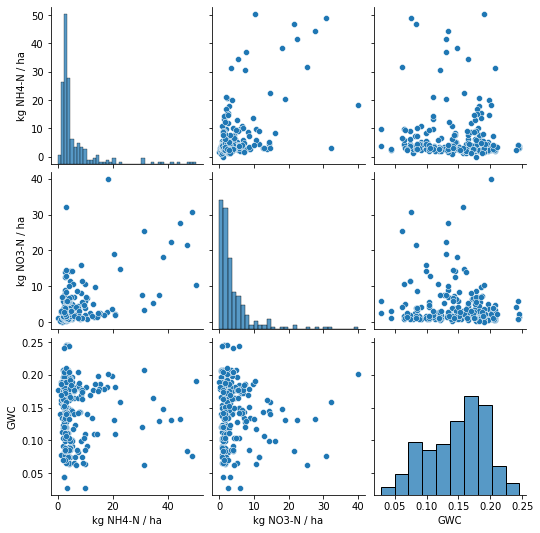

In [45]:
# library & dataset
import seaborn as sns
df = df_merged_harvest_N_soil_qpcr[['kg NH4-N / ha', 'kg NO3-N / ha', 'GWC']]
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(df)

In [55]:
df_merged_harvest_N_soil_qpcr['Sample date'] = pd.to_datetime(df_merged_harvest_N_soil_qpcr['Sample date'])
df_merged_harvest_N_soil_qpcr['Year'] = df_merged_harvest_N_soil_qpcr['Sample date'].dt.year

In [58]:
df_merged_harvest_N_soil_qpcr

Sample date Sample ID Plot     ID  Nitrogen  Water  Block Direction  \
0    2021-06-15        2N   2N  111.0         1      1      1         N   
1    2021-06-15        2S   2S  111.0         1      1      1         S   
2    2021-06-15       23S  23S  211.0         1      1      2         S   
3    2021-06-15       23N  23N  211.0         1      1      2         N   
4    2021-06-15       32N  32N  311.0         1      1      3         N   
..          ...       ...  ...    ...       ...    ...    ...       ...   
230  2022-09-01       30S  30S  321.0         1      2      3         S   
231  2022-09-01       10S  10S  125.0         5      2      1         S   
232  2022-09-01       15S  15S  225.0         5      2      2         S   
233  2022-09-01        9S   9S  126.0         6      2      1         S   
234  2022-09-01       26S  26S  326.0         6      2      3         S   

     Barcode              Notes  ... Run       qPCR_DW       qPCR_FW  \
0       53.0      NxW_B library  ...   B  6.543419e+08  7.834925e+08   
1       65.0      NxW_B library  ...   B  4.302857e+08  5.152132e+08   
2       72.0      NxW_B library  ...   B  7.121023e+08  8.522448e+08   
3       81.0      NxW_B library  ...   B  9.019337e+08  1.079435e+09   
4       55.0      NxW_B library  ...   B  6.264390e+08  7.700979e+08   
..       ...                ...  ...  ..           ...           ...   
230     46.0  NxW_16S_C library  ...   C  1.018754e+09  1.188106e+09   
231     49.0  NxW_16S_C library  ...   C  7.099564e+08  8.336391e+08   
232     42.0  NxW_16S_C library  ...   C  1.064033e+09  1.254721e+09   
233     26.0  NxW_16S_C library  ...   C  1.327898e+09  1.482411e+09   
234     44.0  NxW_16S_C library  ...   C  6.708296e+08  7.720206e+08   

     qPCR_DW_log  qPCR_FW_log       GWC  kg NH4-N / ha  kg NO3-N / ha  \
0      20.299141    20.479272  0.164840       4.801926       3.654158   
1      19.879960    20.060091  0.164840       1.882640       2.880142   
2      20.383732    20.563384  0.164439       6.135351       4.485190   
3      20.620052    20.799704  0.164439       7.523806       4.366603   
4      20.255562    20.462028  0.186546       1.711630       3.139187   
..           ...          ...       ...            ...            ...   
230    20.741846    20.895626  0.142540       7.483866       1.026621   
231    20.380714    20.541311  0.148365      38.428575      18.179555   
232    20.785332    20.950179  0.151977       2.286272       2.703184   
233    21.006863    21.116936  0.104231       9.485991       4.801467   
234    20.324026    20.464522  0.131073      20.473071      18.937547   

     DaysElapsed  Year  
0              0  2021  
1              0  2021  
2              0  2021  
3              0  2021  
4              0  2021  
..           ...   ...  
230          443  2022  
231          443  2022  
232          443  2022  
233          443  2022  
234          443  2022  

[235 rows x 21 columns]

In [59]:
# sns.barplot('Year', 'kg NH4-N / ha', df_merged_harvest_N_soil_qpcr)

<AxesSubplot:xlabel='Sample date', ylabel='kg NH4-N / ha'>

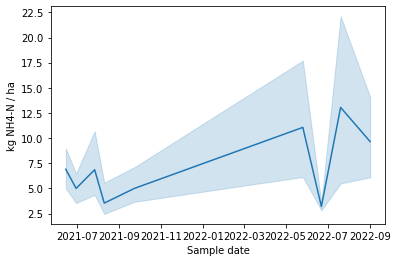

In [53]:
sns.lineplot(x='Sample date', y='kg NH4-N / ha', data=df_merged_harvest_N_soil_qpcr)

<AxesSubplot:xlabel='DaysElapsed', ylabel='kg NO3-N / ha'>

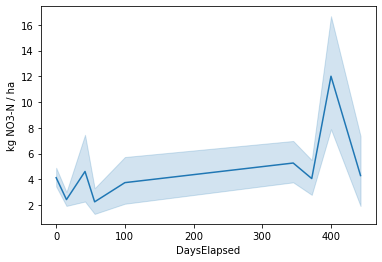

In [48]:
sns.lineplot(x='DaysElapsed', y='kg NO3-N / ha', data=df_merged_harvest_N_soil_qpcr)

<AxesSubplot:xlabel='DaysElapsed', ylabel='GWC'>

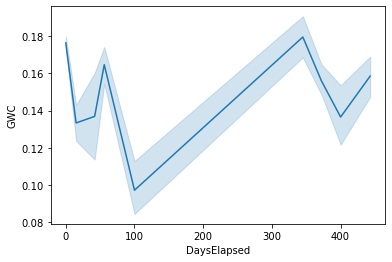

In [49]:
sns.lineplot(x='DaysElapsed', y='GWC', data=df_merged_harvest_N_soil_qpcr)

# Saving file

In [166]:
df_merged_harvest_N_soil_qpcr.to_csv('mapping_file_with_metadata_harvest_corrected.csv')

In [167]:
set(df_merged_harvest_N_soil_qpcr['Sample date'])

{Timestamp('2021-06-15 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2022-05-26 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-09-27 00:00:00')}